In [9]:
import matplotlib.ticker as tck
import matplotlib.pyplot as plt
import numpy as np
import random
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay, ConvexHull
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import math

In [10]:
def observabledomain(cos_theta_i,cos_theta_r):
    if cos_theta_i >= 0 and cos_theta_r >= 0:
        return 1
    else:
        return 0    
def deltapeak(x,sigma):
    delta = np.exp(-(x)**2/(2*sigma))/np.sqrt(2*np.pi*sigma)
    return delta

def format_func(value, tick_number):
    # find number of multiples of pi/6
    N = int(np.round(6 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/6$"
    elif N == 2:
        return r"$2\pi/6$"
    elif N == 3:
        return r"$3\pi/6$"
    elif N == 4:
        return r"$4\pi/6$"
    elif N == 5:
        return r"$5\pi/6$"
    elif N == 6:
        return r"$\pi$"
    elif N % 6 > 0:
        return r"${0}\pi/6$".format(N)
    else:
        return r"${0}\pi$".format(N // 6)

In [11]:
res = 40
N_phi = 2*res
N_theta = res
N_alpha = 100


sigma = 0.01
nwater = 1.33
epsilon = 0.000000001
Lamb = np.zeros((N_alpha,2*res**2))
Lambcheck = np.zeros((N_alpha,2*res**2))
Opp1 = np.zeros((N_alpha,2*res**2))
Opp2 = np.zeros((N_alpha,2*res**2))
Lommel = np.zeros((N_alpha,2*res**2))





delta_phi = np.pi/res
delta_theta = np.pi/res
delta_Omega = delta_phi*delta_theta


In [12]:
alpha = np.linspace(0,np.pi,N_alpha)
m = 0

for i in range(N_alpha):
    i_hat = np.array([np.cos(alpha[i]),np.sin(alpha[i]),0])
    r_hat = np.array([1,0,0])
    print(str(i+1)+' /'+str(N_alpha))

    for j in range(2*res**2):
        phi = math.floor(j/res)*delta_phi
        theta = (j%res)*delta_theta
        s_hat = np.array([np.cos(phi)*np.sin(theta),np.sin(phi)*np.sin(theta),np.cos(theta)])


        cos_theta_i = np.inner(i_hat,s_hat)
        theta_i = np.arccos(cos_theta_i)
        

        cos_theta_r = np.inner(r_hat,s_hat)
        theta_r = np.arccos(cos_theta_r)


        p1 = np.cross(i_hat,s_hat)/(np.linalg.norm(np.cross(i_hat,s_hat))+epsilon) #epsilon to ensure norm(p1)<1
        

        p2 = np.cross(r_hat,s_hat)/(np.linalg.norm(np.cross(r_hat,s_hat))+epsilon)
        


        cos_psi = np.inner(p1,p2)
        
        
        psi = np.arccos(cos_psi)

        Rs = abs((np.cos(theta_i)-np.sqrt(nwater**2-np.sin(theta_i)**2))/(np.cos(theta_i)+np.sqrt(nwater**2-np.sin(theta_i)**2)))**2
        Rp = abs(((nwater**2)*np.cos(theta_i)-np.sqrt(nwater**2-np.sin(theta_i)**2))/((nwater**2)*np.cos(theta_i)+np.sqrt(nwater**2-np.sin(theta_i)**2)))**2

        Lamb[i][j]    = 4*observabledomain(cos_theta_i,cos_theta_r)*cos_theta_i*cos_theta_r*np.sin(theta)*delta_Omega/np.pi
        Opp1[i][j]    = 4*observabledomain(cos_theta_i,cos_theta_r)*cos_theta_i*cos_theta_r*np.sin(theta)*delta_Omega*deltapeak(theta_i-theta_r,sigma)*deltapeak(psi-np.pi,sigma)/(np.sin(theta_r)*np.cos(theta_r)+epsilon)
        Opp2[i][j]    = Opp1[i][j]*(Rs+Rp)/2

        Lommel[i][j]  = np.abs(4*observabledomain(cos_theta_i,cos_theta_r)*cos_theta_i*cos_theta_r*np.sin(theta)*delta_Omega*2/(3*np.pi**2)*(np.sin(alpha[i])+(np.pi-alpha[i])*np.cos(alpha[i]))/(np.cos(theta_i)+np.cos(theta_r)+epsilon))


1 /100
2 /100
3 /100
4 /100
5 /100
6 /100
7 /100
8 /100
9 /100
10 /100
11 /100
12 /100
13 /100
14 /100
15 /100
16 /100
17 /100
18 /100
19 /100
20 /100
21 /100
22 /100
23 /100
24 /100
25 /100
26 /100
27 /100
28 /100
29 /100
30 /100
31 /100
32 /100
33 /100
34 /100
35 /100
36 /100
37 /100
38 /100
39 /100
40 /100
41 /100
42 /100
43 /100
44 /100
45 /100
46 /100
47 /100
48 /100
49 /100
50 /100
51 /100
52 /100
53 /100
54 /100
55 /100
56 /100
57 /100
58 /100
59 /100
60 /100
61 /100
62 /100
63 /100
64 /100
65 /100
66 /100
67 /100
68 /100
69 /100
70 /100
71 /100
72 /100
73 /100
74 /100
75 /100
76 /100
77 /100
78 /100
79 /100
80 /100
81 /100
82 /100
83 /100
84 /100
85 /100
86 /100
87 /100
88 /100
89 /100
90 /100
91 /100
92 /100
93 /100
94 /100
95 /100
96 /100
97 /100
98 /100
99 /100
100 /100


In [13]:
A = np.ones(2*res**2)

lamb_curve = np.matmul(Lamb,A)
#normcheck_curve = np.matmul(normcheck,A)
lambertian_analytical = 8/(3*np.pi)*(np.sin(alpha)+(np.pi-alpha)*np.cos(alpha))
##
##
opp1_curve = np.matmul(Opp1,A)
opp2_curve = np.matmul(Opp2,A)
##
##wp = 20
##
##opp1_curve[:wp] = [1]*wp
##opp2_curve[:wp] = [0]*wp
lommel_curve = np.matmul(Lommel,A)

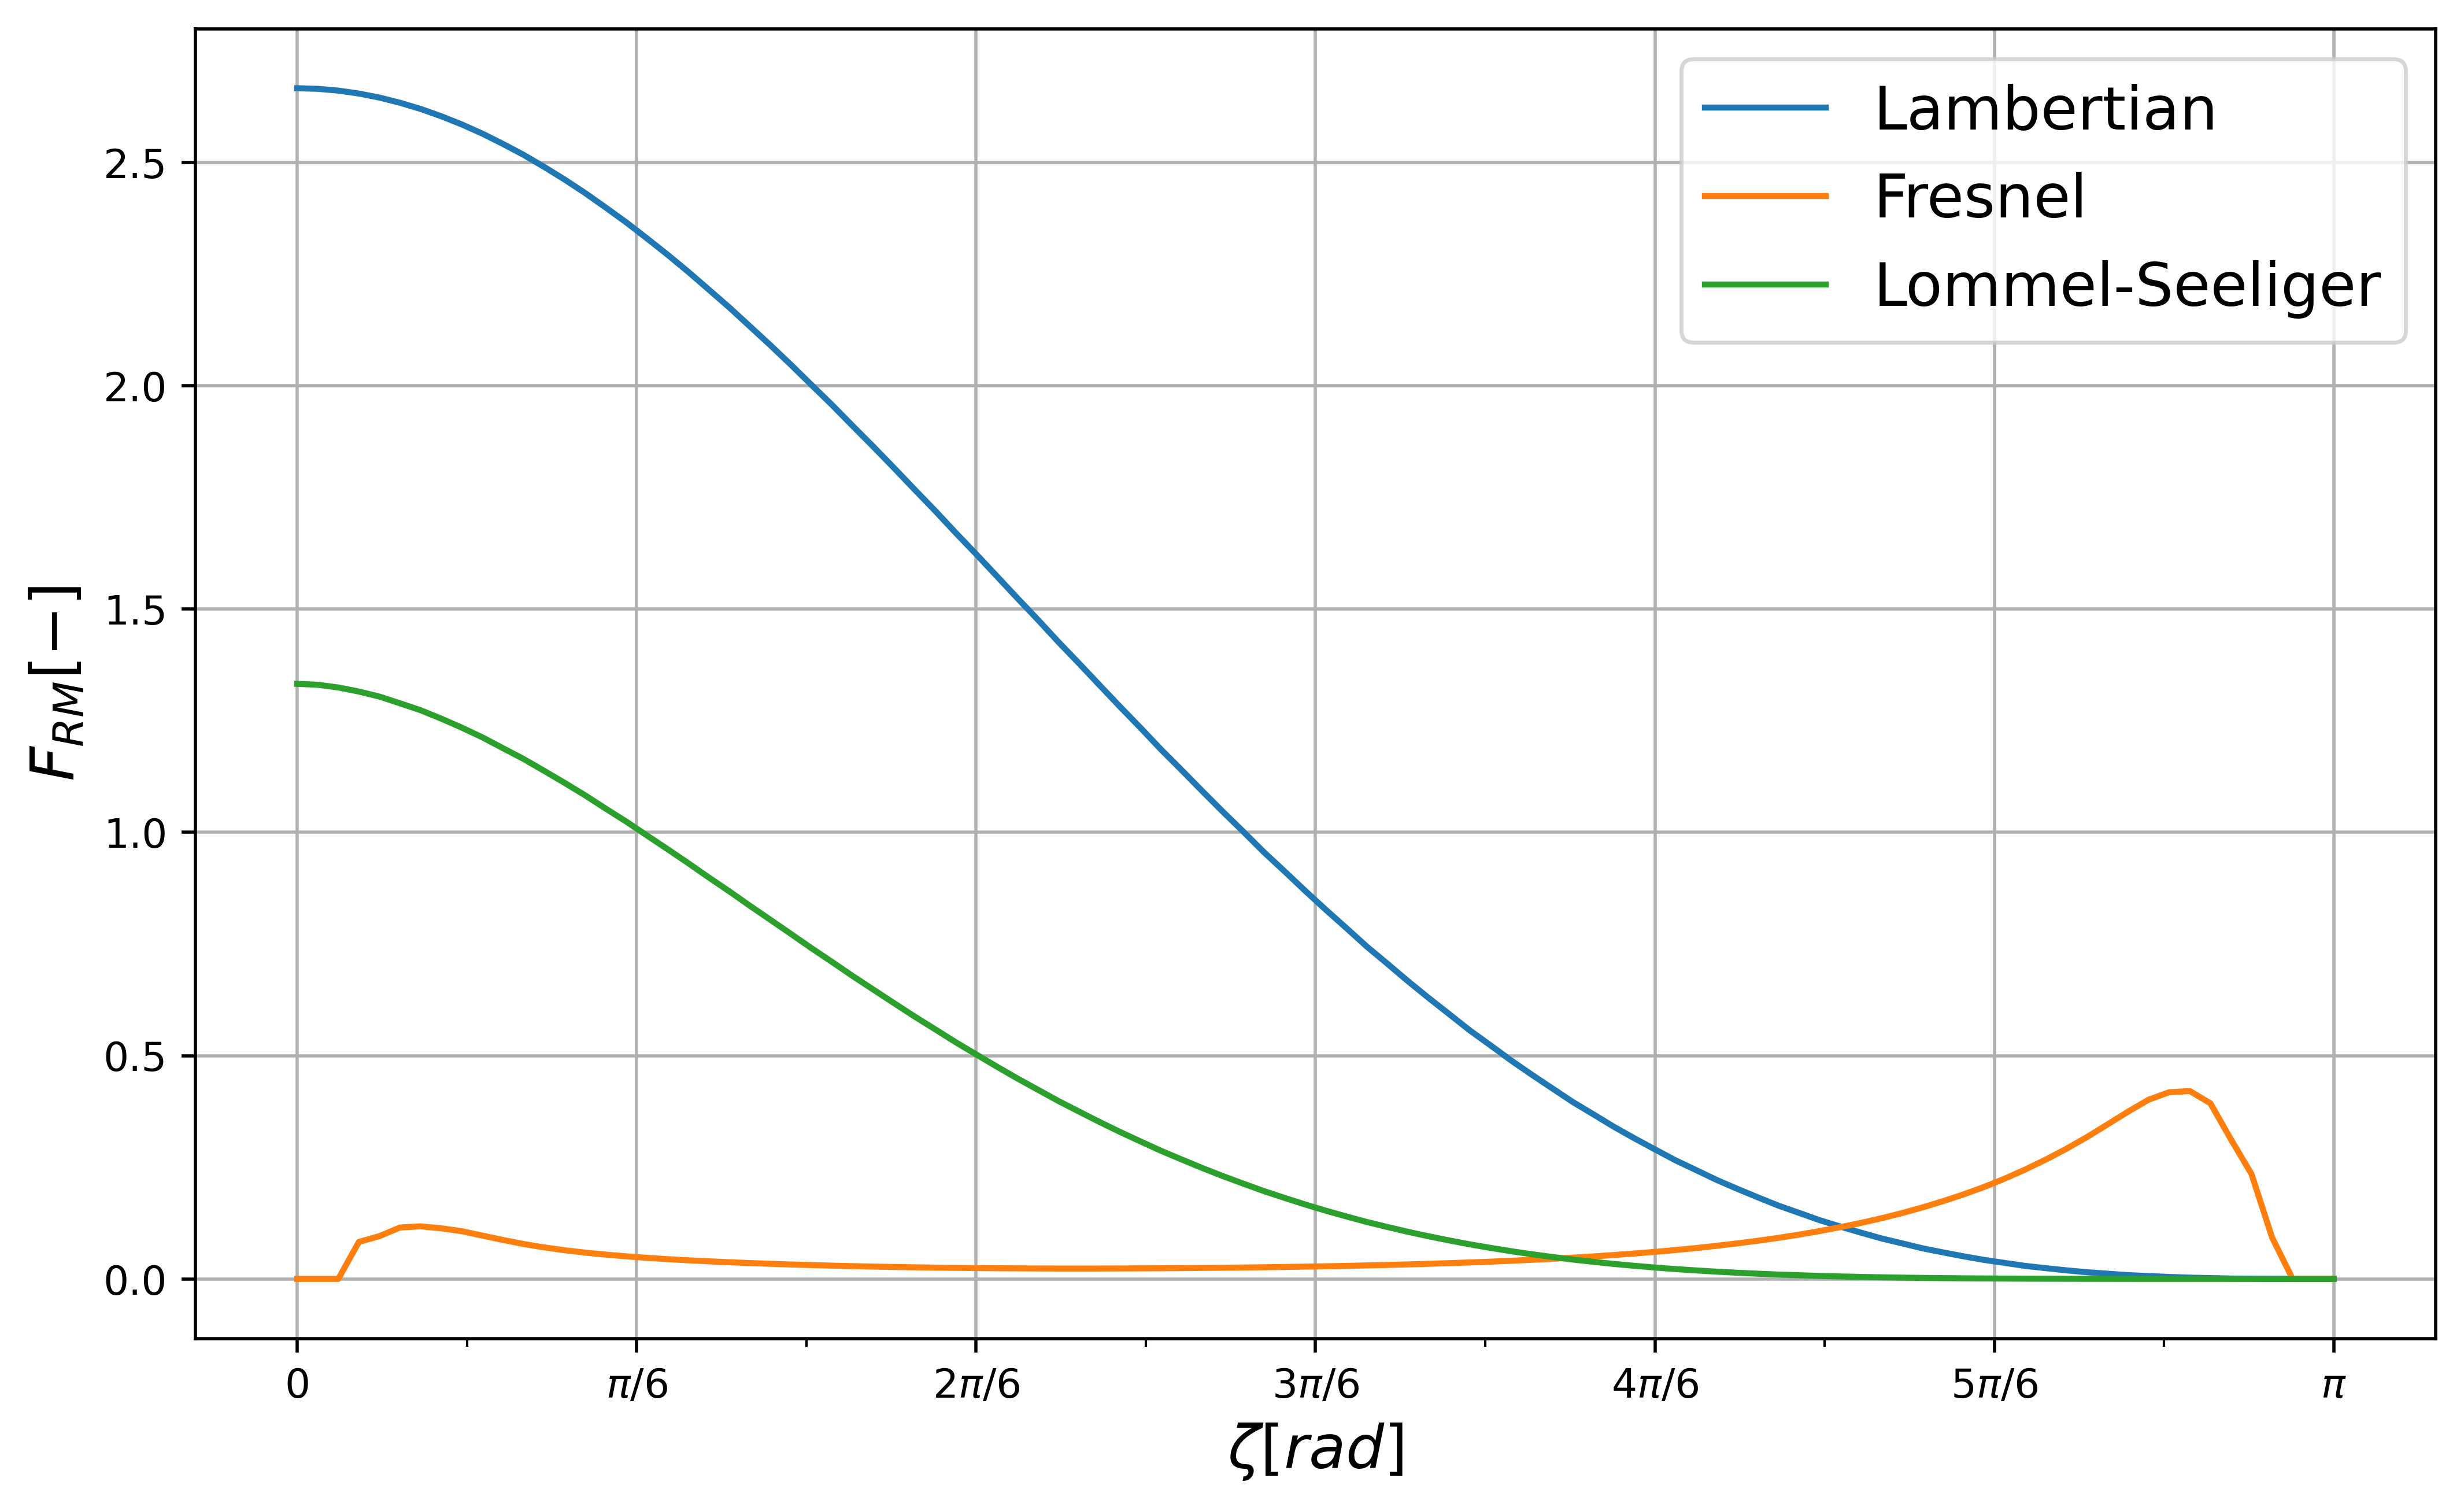

In [18]:
%matplotlib inline
f,ax=plt.subplots(figsize=(10,6), dpi=500)

ax.plot(alpha,lamb_curve, label= 'Lambertian')
#ax.plot(alpha, lambertian_analytical, label= 'Analytical')
#ax.plot(alpha, opp1_curve, label= 'Metallic glint')
ax.plot(alpha, opp2_curve, label= 'Fresnel')
ax.plot(alpha, lommel_curve, label= 'Lommel-Seeliger')
plt.xlabel('$\zeta [rad]$',fontsize = 15)
plt.ylabel('$F_{RM} [-]$',fontsize = 15)
#plt.title('Phase function')
plt.legend(prop={'size': 15})
plt.grid()
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 6))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))


plt.show()

In [21]:
#normalisations
res = 200
N_phi = res
N_theta_r = res
N_theta_i= 300


sigma = 0.001
nwater = 1.33
epsilon = 0.000000001


Lambnom = np.zeros((N_theta_i,2*res**2))
Opp1nom = np.zeros((N_theta_i,2*res**2))
Opp2nom = np.zeros((N_theta_i,2*res**2))
Lommelnom = np.zeros((N_theta_i,2*res**2))
Lommelnom2 = np.zeros((N_theta_i,2*res**2))
normcheck = np.zeros((N_theta_i,2*res**2))
Rs = np.zeros(2*res**2)



delta_phi = np.pi/res
delta_theta = np.pi/2/res
delta_Omega = delta_phi*delta_theta

theta_i = np.linspace(0,np.pi/2,N_theta_i)

In [4]:
for i in range(N_theta_i):
    print(str(i+1)+' /'+str(N_theta_i))
    for j in range(2*res**2):
        psi = math.floor(j/res)*delta_phi
        theta_r = (j%res)*delta_theta

        cos_alpha = np.cos(theta_i[i])*np.cos(theta_r)+np.cos(psi)*np.sin(theta_i[i])*np.sin(theta_r)
        alpha = np.arccos(cos_alpha)

        Rs = abs((np.cos(theta_i[i])-np.sqrt(nwater**2-np.sin(theta_i[i])**2))/(np.cos(theta_i[i])+np.sqrt(nwater**2-np.sin(theta_i[i])**2)))**2
        Rp = abs(((nwater**2)*np.cos(theta_i[i])-np.sqrt(nwater**2-np.sin(theta_i[i])**2))/((nwater**2)*np.cos(theta_i[i])+np.sqrt(nwater**2-np.sin(theta_i[i])**2)))**2
        
        Lambnom[i][j] = np.sin(theta_r)*np.cos(theta_r)*delta_Omega*1/np.pi
##
        Opp1nom[i][j] = delta_Omega*deltapeak(theta_i[i]-theta_r,sigma)*deltapeak(psi-np.pi,sigma)
        Opp2nom[i][j] = Opp1nom[i][j]*(Rs+Rp)/2

        Lommelnom[i][j] = np.sin(theta_r)*np.cos(theta_r)*delta_Omega*(np.sin(alpha)+(np.pi-alpha)*np.cos(alpha))/(np.cos(theta_i[i])+np.cos(theta_r)+epsilon)*2/(3*np.pi**2)
        Lommelnom2[i][j] = np.sin(theta_r)*np.cos(theta_r)*delta_Omega*(1)/(4*np.pi*(np.cos(theta_i[i])+np.cos(theta_r)+epsilon))

1 /300
2 /300
3 /300
4 /300
5 /300
6 /300
7 /300
8 /300
9 /300
10 /300
11 /300
12 /300
13 /300
14 /300
15 /300
16 /300
17 /300
18 /300
19 /300
20 /300
21 /300
22 /300
23 /300
24 /300
25 /300
26 /300
27 /300
28 /300
29 /300
30 /300
31 /300
32 /300
33 /300
34 /300
35 /300
36 /300
37 /300
38 /300
39 /300
40 /300
41 /300
42 /300
43 /300
44 /300
45 /300
46 /300
47 /300
48 /300
49 /300
50 /300
51 /300
52 /300
53 /300
54 /300
55 /300
56 /300
57 /300
58 /300
59 /300
60 /300
61 /300
62 /300
63 /300
64 /300
65 /300
66 /300
67 /300
68 /300
69 /300
70 /300
71 /300
72 /300
73 /300
74 /300
75 /300
76 /300
77 /300
78 /300
79 /300
80 /300
81 /300
82 /300
83 /300
84 /300
85 /300
86 /300
87 /300
88 /300
89 /300
90 /300
91 /300
92 /300
93 /300
94 /300
95 /300
96 /300
97 /300
98 /300
99 /300
100 /300
101 /300
102 /300
103 /300
104 /300
105 /300
106 /300
107 /300
108 /300
109 /300
110 /300
111 /300
112 /300
113 /300
114 /300
115 /300
116 /300
117 /300
118 /300
119 /300
120 /300
121 /300
122 /300
123 /300
1

In [5]:
A = np.ones(2*res**2)

lambnom_curve = np.matmul(Lambnom,A)
opp1nom_curve = np.matmul(Opp1nom,A)
opp2nom_curve = np.matmul(Opp2nom,A)

lommelnom_curve = np.matmul(Lommelnom,A)
lommel2 = np.matmul(Lommelnom2,A)

print(np.max(lambnom_curve),np.max(opp1nom_curve),np.max(opp2nom_curve),np.max(lommelnom_curve),np.max(lommel2))
#wp = 10

#opp1nom_curve[:wp] = [1]*wp

lambfactor = 1/(np.max(lambnom_curve))
metalfactor = 1/(np.max(opp1nom_curve))
waterfactor = 1/np.max(opp2nom_curve)
seeligerfactor = 1/np.max(lommelnom_curve)

print(lambfactor,metalfactor,waterfactor,seeligerfactor)

0.9999794382396066 1.0 0.6816095137692018 0.4978757495622177 0.4980339316674107
1.0000205621831881 1.0 1.4671156722419336 2.008533255293716


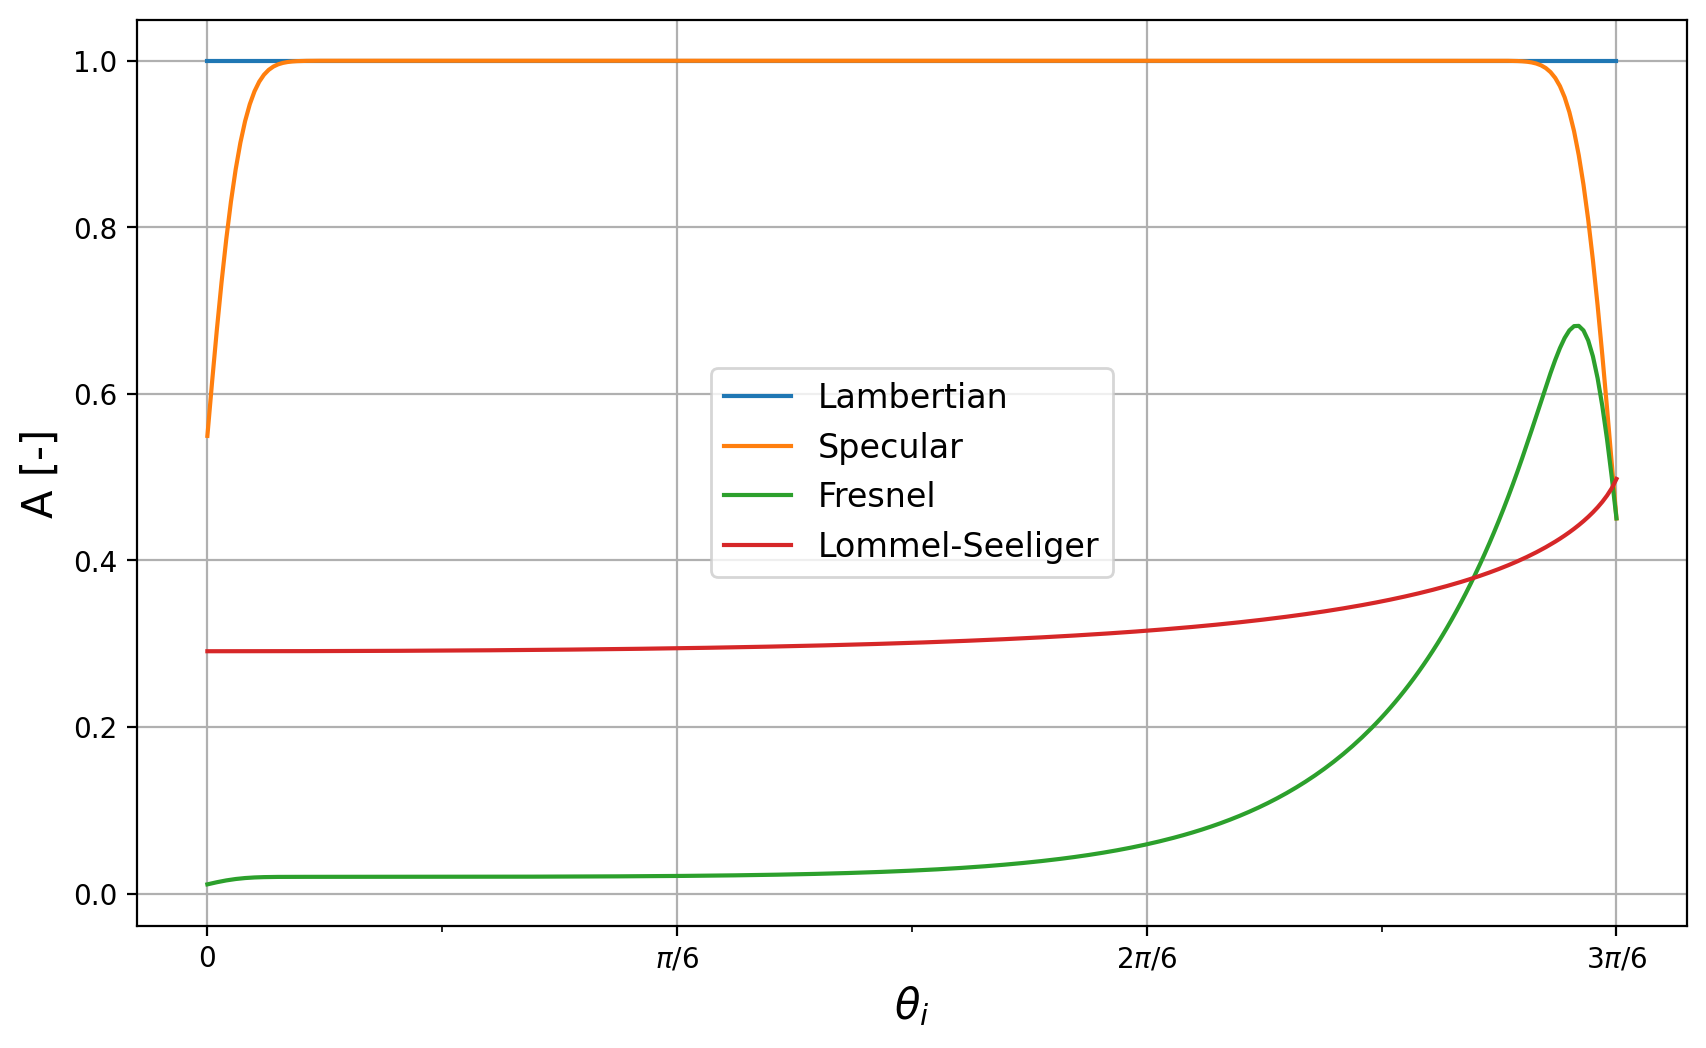

In [24]:
f,ax=plt.subplots(figsize=(10,6), dpi=200)
ax.plot(theta_i,lambnom_curve,label='Lambertian')
ax.plot(theta_i,opp1nom_curve,label='Specular')
ax.plot(theta_i,opp2nom_curve,label='Fresnel')
ax.plot(theta_i,lommelnom_curve,label='Lommel-Seeliger')
plt.xlabel('$\\theta_i$',fontsize = 15)
plt.ylabel('A [-]', fontsize = 15)
#plt.ylabel('magnitude')
#plt.title('normalisation')
plt.legend(prop={'size': 12})
plt.grid()
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 6))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))


plt.show()

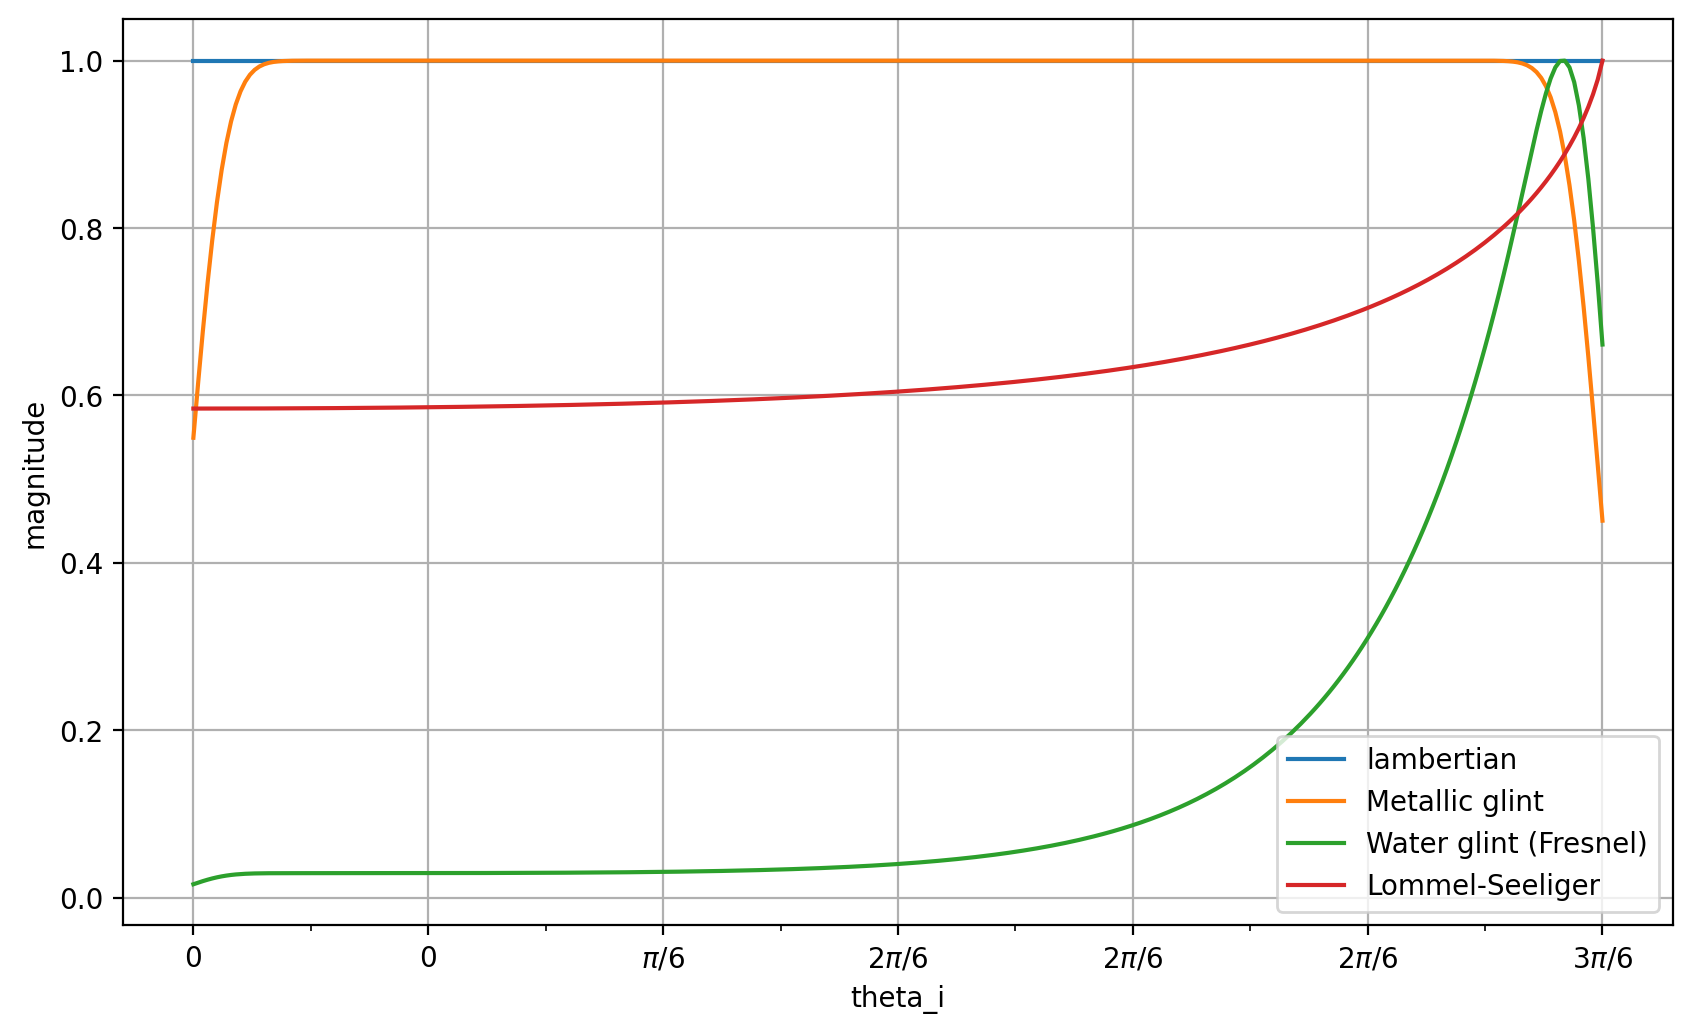

In [7]:
normlamb = np.multiply(lambfactor,lambnom_curve)
normmetal = np.multiply(metalfactor,opp1nom_curve)
normwater = np.multiply(waterfactor,opp2nom_curve)
normseeliger = np.multiply(seeligerfactor,lommelnom_curve)


f,ax=plt.subplots(figsize=(10,6), dpi = 200)
ax.plot(theta_i,normlamb,label='lambertian')
ax.plot(theta_i,normmetal,label='Metallic glint')
ax.plot(theta_i,normwater,label='Water glint (Fresnel)')
ax.plot(theta_i,normseeliger,label='Lommel-Seeliger')
plt.xlabel('theta_i')
plt.ylabel('magnitude')
#plt.title('normalisation')
plt.legend()
plt.grid()
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 24))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))


plt.show()

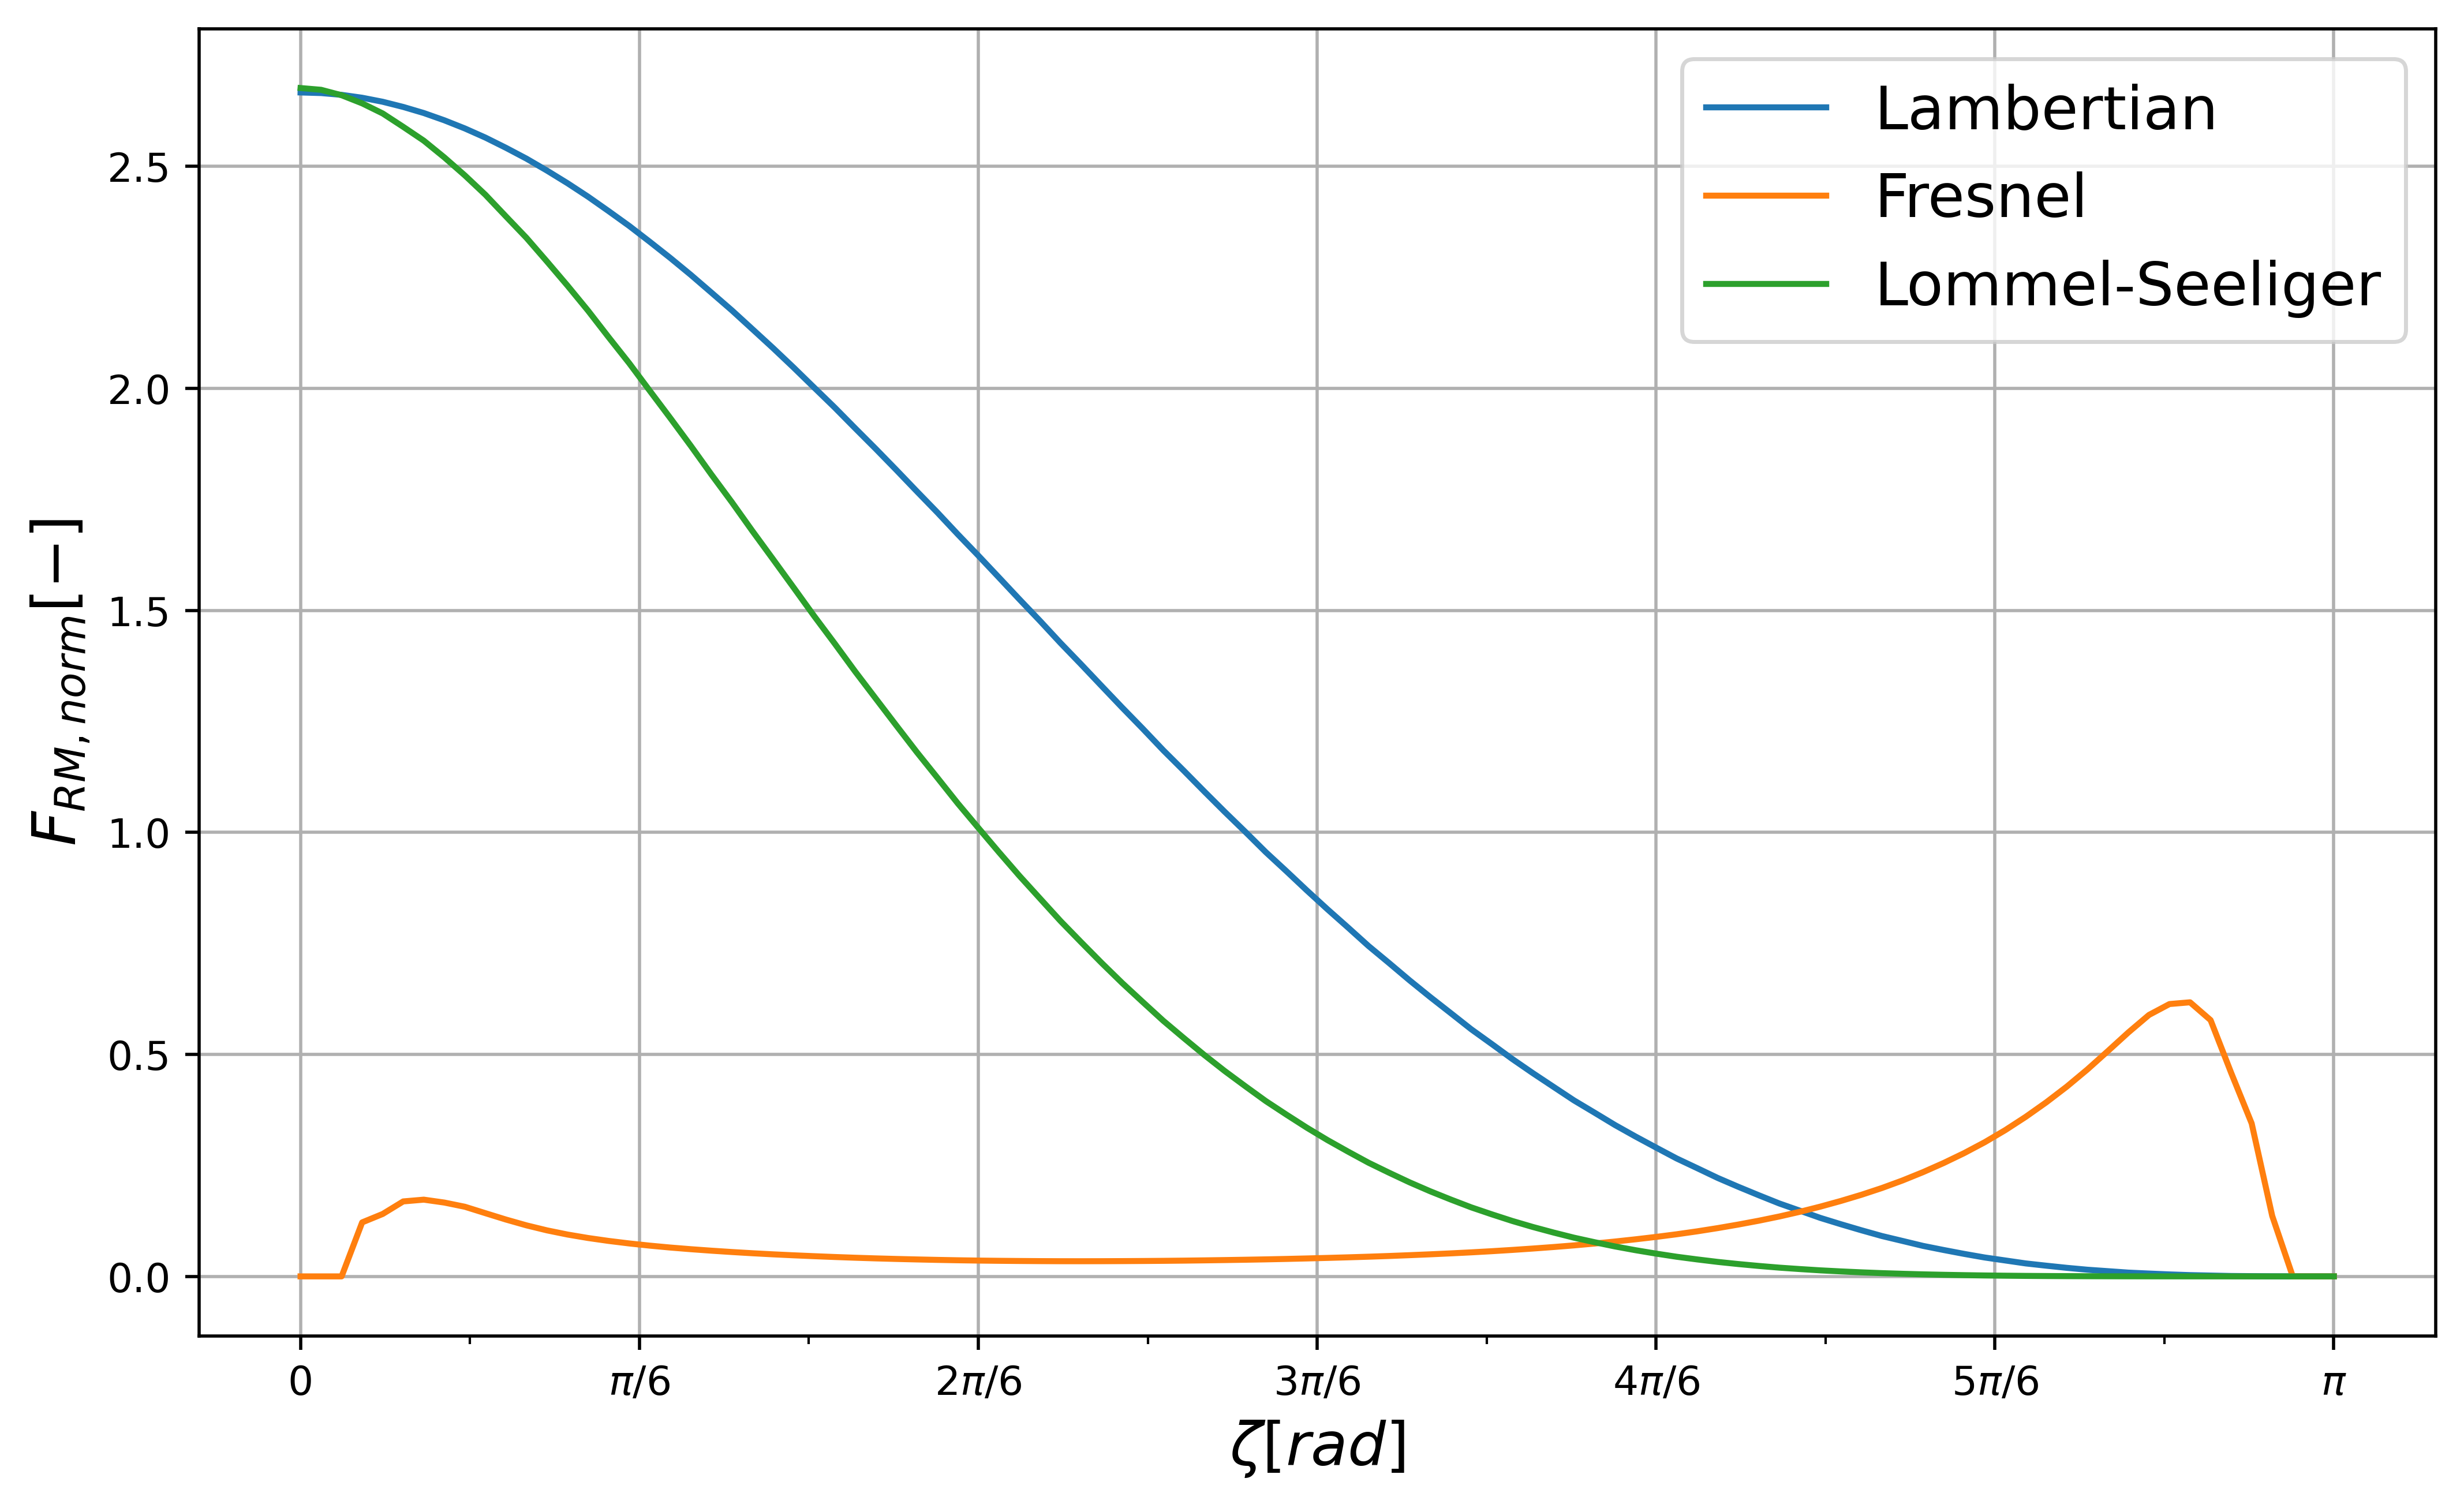

In [19]:
res = 100
N_phi = 2*res
N_theta = res
N_alpha = 100

alpha = np.linspace(0,np.pi,N_alpha)

normlambphase = np.multiply(lambfactor,lamb_curve)
normmetalphase = np.multiply(metalfactor,opp1_curve)
normwaterphase = np.multiply(waterfactor,opp2_curve)
normseeligerphase = np.multiply(seeligerfactor,lommel_curve)

%matplotlib inline
f,ax=plt.subplots(figsize=(10,6), dpi=500)


ax.plot(alpha,normlambphase, label= 'Lambertian')
#ax.plot(alpha, normmetalphase, label= 'Metallic glint')
ax.plot(alpha, normwaterphase, label= 'Fresnel')
ax.plot(alpha, normseeligerphase, label= 'Lommel-Seeliger')
plt.xlabel('$\zeta [rad]$',fontsize = 15)
plt.ylabel('$F_{RM, norm} [-]$',fontsize = 15)
#plt.title('Phase function')
plt.legend(prop={'size': 15})
plt.grid()
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 6))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))


plt.show()